# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html,'html.parser')

In [5]:
# <th> , <tr> , <td>

In [6]:
# Extract all rows of data
rows = html_soup.find_all('tr',class_ = "data-row")

In [9]:
rows[0]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
my_list = []
# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td')
    x = [col.text for col in td]
    my_list.append(x)

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(my_list,columns=["id","date","sol","ls","month","min_temp","pressure"])

In [14]:
# Confirm DataFrame was created successfully
df.head()

,id,date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
df.dtypes

id          object
date        object
sol         object
ls          object
month       object
min_temp    object
pressure    object
dtype: object

In [18]:
# Change data types for data analysis
df.id = df.id.astype('int')
df.date = pd.to_datetime(df.date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [19]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                   int32
date        datetime64[ns]
sol                  int32
ls                   int32
month                int32
min_temp           float64
pressure           float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [21]:
# 1. How many months are there on Mars?
df.month.value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [22]:
# 2. How many Martian days' worth of data are there?
df.sol.nunique()

1867

In [23]:
# 3. What is the average low temperature by month?
min_temperature_by_month = df.groupby('month')['min_temp'].mean()
min_temperature_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

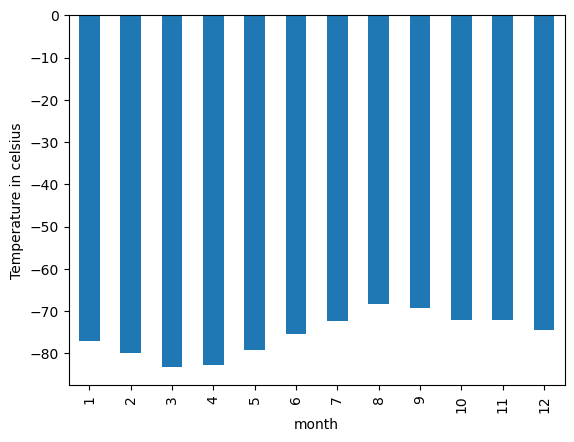

In [27]:
# Plot the average temperature by month
min_temperature_by_month.plot(kind='bar')
plt.ylabel('Temperature in celsius')
plt.show()

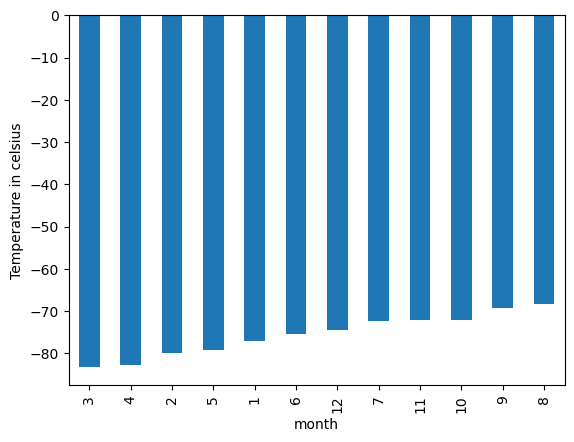

In [28]:
# Identify the coldest and hottest months in Curiosity's location
min_temperature_by_month.sort_values().plot(kind='bar')
plt.ylabel('Temperature in celsius')
plt.show()

In [29]:
# 4. Average pressure by Martian month
pressure_by_month = df.groupby('month')['pressure'].mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='month'>

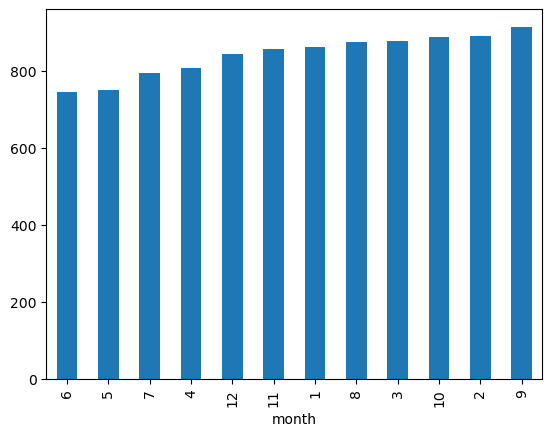

In [31]:
# Plot the average pressure by month
pressure_by_month.sort_values().plot(kind='bar')

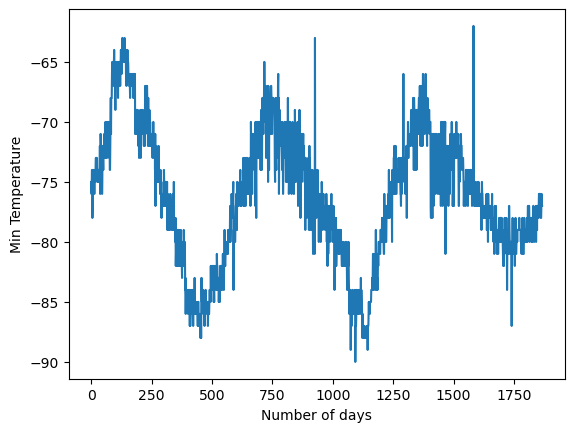

In [33]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.min_temp.plot()
plt.xlabel("Number of days")
plt.ylabel("Min Temperature")
plt.show()

Although all temperatures are below 0 celsius, the third month in Mars has the coldest minimum temperature, and the eighth month is the warmest. 


The sixth month on Mars has the lowest Atmospheric pressure, whereas the ninth has the highest.

The distance from one peak to the other is roughly 1425-750, or 675 days. A whole year on Mars would then last about 675 days from the plot. Internet search confirms that one year in Mars last 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [37]:
# Write the data to a CSV
df.to_csv("mars_data.csv",index=False)

In [38]:
browser.quit()